Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
!pip install apyori
!pip install mlxtend
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [3]:
book = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\8\assign9\book.csv")
book.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
book.shape

(2000, 11)

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [8]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [10]:
item_set = {}

In [11]:
te = TransactionEncoder()

In [14]:
te_array = te.fit(book).transform(book)
df= pd.DataFrame(te_array, columns=te.columns_)

<Figure size 1500x800 with 0 Axes>

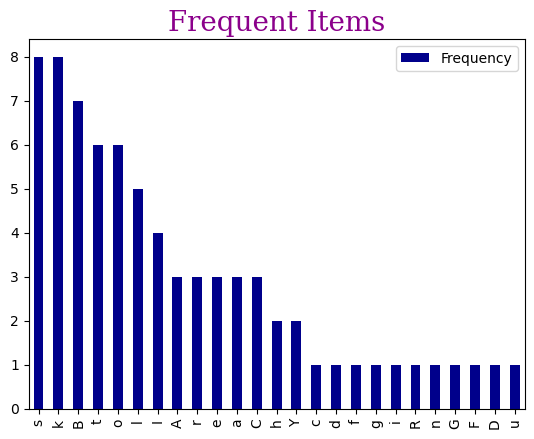

In [35]:
plt.figure(figsize=(15,8))
font1 = {'family':'serif','color':'darkmagenta','size':20}
font2 = {'family':'serif','color':'maroon','size':15}   

df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',color ='darkblue');
plt.title("Frequent Items", fontdict= font1)                                                                             
                                                           
plt.show()

In [16]:
#Apriori algorithm

In [17]:
df_0_5 = {}
df_1 = {}
df_5 = {}
df_1_0 = {}

In [18]:
confi = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [25]:
def gen_rules(df,confidence,support):
    df = {}
    for i in confi:
        df_i =apriori(book,support,True)
        rule= association_rules(df_i,min_threshold=i)
        df[i] = len(rule.antecedents)
    return pd.Series(df).to_frame("Support: %s"%support)

In [27]:
confs = []

for i in [0.001,0.005,0.01,0.05,0.1]:
    df_i = gen_rules(df,confidence=confi,support=i)
    confs.append(df_i)

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result

In [28]:
all_confi = pd.concat(confs,axis=1)

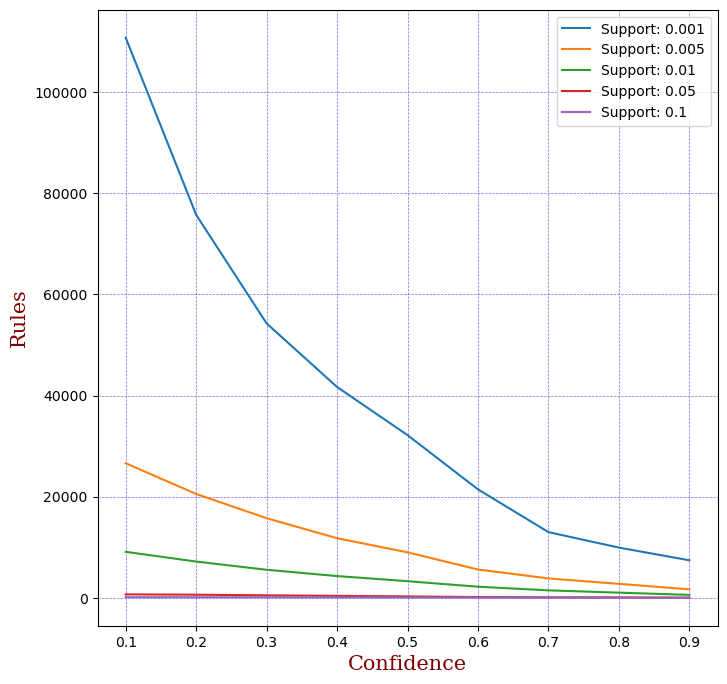

In [36]:
all_confi.plot(figsize=(8,8))
Grid=plt.grid(color = 'mediumslateblue', linestyle = '--', linewidth = 0.5)
plt.ylabel('Rules',fontdict =font2)
plt.xlabel('Confidence', fontdict = font2)
plt.show()

In [37]:
#Conclusiom
#As shown in above graph
#1.Lower the Confidence level Higher the no. of rules.
#2.Higher the Support, lower the no. of rules.

In [38]:
#Lets try with Support 0.01 and Confidence at 0.4

book_final =  apriori(df,0.001,True)
bk_final = association_rules(book_final,min_threshold=.4,support_only=False)
bk_final[bk_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
740,"(o, Y)","(k, B, s, t)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf
741,"(k, Y)","(o, B, s, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
742,"(s, Y)","(o, k, B, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
743,"(B, Y)","(o, k, s, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf


In [43]:
support = bk_final["support"]
confidence =  bk_final["confidence"]
lift = bk_final["lift"]

Text(0.5, 0, 'lift')

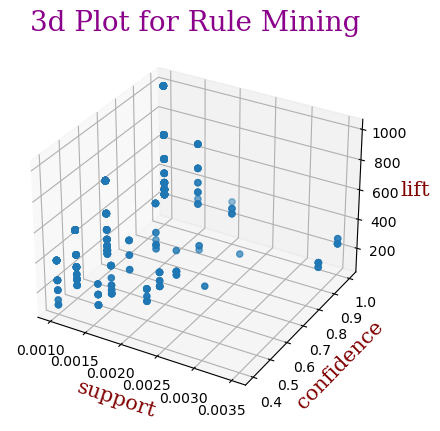

In [40]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_title("3d Plot for Rule Mining",fontdict = font1)
ax1.set_xlabel("support",fontdict = font2)
ax1.set_ylabel("confidence",fontdict = font2)
ax1.set_zlabel("lift",fontdict = font2)

Text(0, 0.5, 'confidence')

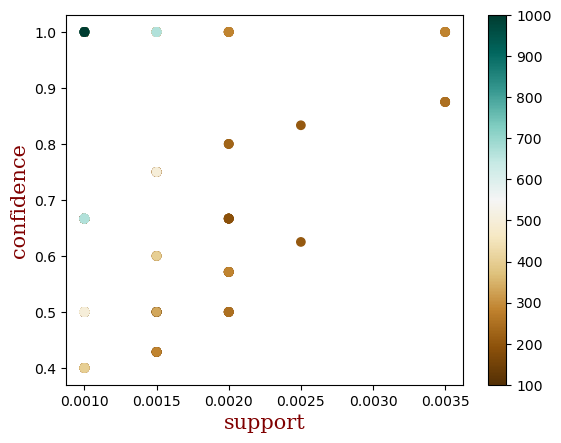

In [50]:
plt.scatter(support,confidence, c =lift, cmap = 'BrBG')
plt.colorbar()
plt.xlabel("support",fontdict = font2);
plt.ylabel("confidence", fontdict = font2)